#### Import the dependencies

In [21]:
pip install jupyter_contrib_nbextensions

     ---------------------------------------- 0.0/23.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/23.5 MB ? eta -:--:--
     ---------------------------------------- 0.3/23.5 MB ? eta -:--:--
     ---------------------------------------- 0.3/23.5 MB ? eta -:--:--
     - ------------------------------------- 0.8/23.5 MB 907.1 kB/s eta 0:00:25
     - ------------------------------------- 0.8/23.5 MB 907.1 kB/s eta 0:00:25
     - ------------------------------------- 1.0/23.5 MB 868.0 kB/s eta 0:00:26
     -- ------------------------------------- 1.3/23.5 MB 1.0 MB/s eta 0:00:23
     -- ------------------------------------ 1.6/23.5 MB 999.0 kB/s eta 0:00:22
     -- ------------------------------------ 1.6/23.5 MB 999.0 kB/s eta 0:00:22
     --- ----------------------------------- 1.8/23.5 MB 860.4 kB/s eta 0:00:26
     --- ----------------------------------- 1.8/23.5 MB 860.4 kB/s eta 0:00:26
     --- ----------------------------------- 1.8/23.5 MB 860.4 kB/s eta 0

In [20]:
pip install ipython

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#### data collection and processing

Data Overview: This data file is a Comma separated value file format with 2290 rows and 6 columns. It contains 5 columns which are numerical in datatype and one column in Date format. Clearly the data shows value of the variables SPX,GLD,USO,SLV,EUR/USD against the dates in the date column.

In [2]:
data=pd.read_csv(r"C:\Users\Shashi Shekhar\Desktop\python\Dataset for resume projects\gld_price_data.csv")
data.shape

(2290, 6)

In [3]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
#getting basic information of data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
#gtting missing values details
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
#getting statistical details as
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


#### Correlation
1. Positive Correlation
2. Negative Correlation


In [8]:
correlation=data.drop(["Date"], axis=1).corr()

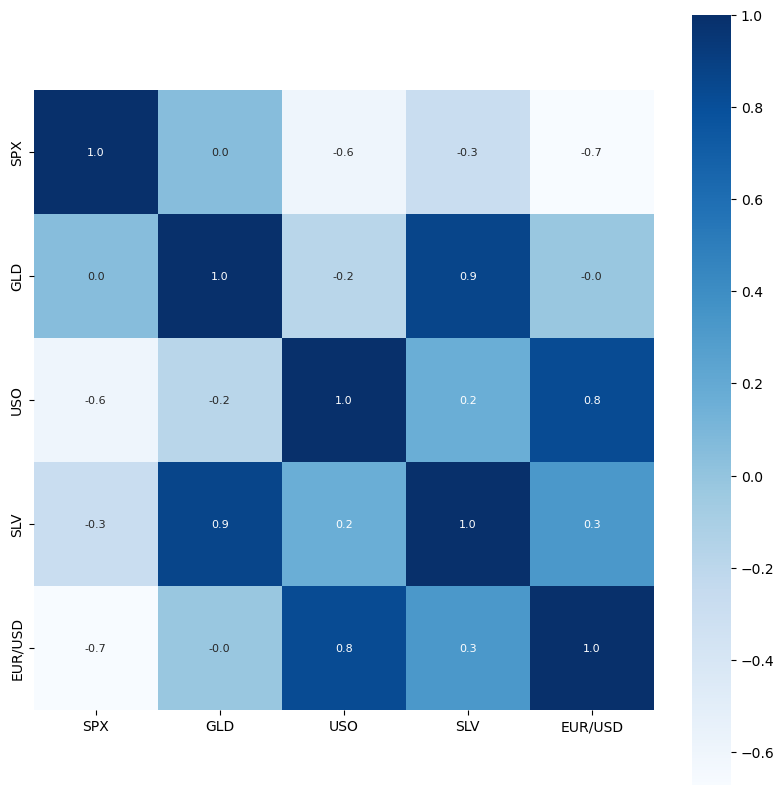

In [9]:
# making the heatmap to understanding the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size":8}, cmap="Blues");

#### As from above we conclude that Gold price is directly proprtional to Silver Price
#### As from above we conclude that Gold price is inversly proprtional to USO, EUR/USD

In [10]:
#correlation value of gold 
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Shashi Shekhar\AppData\Local\Temp\ipykernel_14780\1312922984.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["GLD"], color="orange");
C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


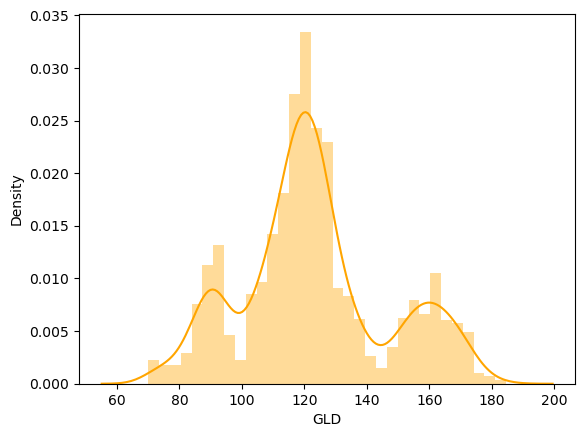

In [12]:
#checking the distribution of gold price
sns.distplot(data["GLD"], color="orange");

#### split the Features and Target

In [14]:
X=data.drop(columns=["Date", "GLD"], axis=1)
Y=data["GLD"]
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [15]:
Y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

#### split into training and test data

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1832, 4) (458, 4) (1832,) (458,)


#### Model training data:
Random Forest Regressor

In [19]:
model=RandomForestRegressor()

In [22]:
#training the model
model.fit(X_train, Y_train)

RandomForestRegressor()

#### model evaluation

In [23]:
# prediction on test data
X_test_prediction=model.predict(X_test)
print(X_test_prediction)

[168.63759952  81.9451999  115.97440016 127.6534007  120.58790119
 154.7833975  150.25799877 126.09599999 117.47789879 126.19940046
 116.90200089 171.10660064 142.04269903 167.79859844 115.17340012
 117.73650072 140.72950257 170.14230034 159.03350301 158.74419974
 155.12130012 125.41130025 176.21329982 157.57620333 125.26680048
  93.92579962  77.18069998 120.43629997 119.09569963 167.49609924
  88.20880035 125.32099997  91.08860086 117.74880009 121.15279885
 135.84400139 115.93750108 115.18750056 147.04020021 107.35480114
 104.65320256  87.21109781 126.41040082 117.75480009 153.72819888
 119.59769997 108.36199987 108.08649826  93.33700086 127.27739735
  75.19580021 113.76979906 121.60830036 111.26489938 118.88619912
 120.39400007 159.40949976 167.69010054 147.05809686  85.70479854
  94.45540012  86.93359924  90.53350004 119.00440063 126.48140086
 127.68880056 169.41040016 122.41439927 117.34649877  98.49070033
 168.21340061 142.87859884 131.11480239 121.18110168 120.81439943
 119.72790

In [24]:
# R squared error
error_score=metrics.r2_score(Y_test, X_test_prediction)
print("R squared Error:", error_score)

R squared Error: 0.9892253442358337


#### compare the actual value and predicted values in plot

In [25]:
#convert  y_test in list to plotting graph
Y_test=list(Y_test)

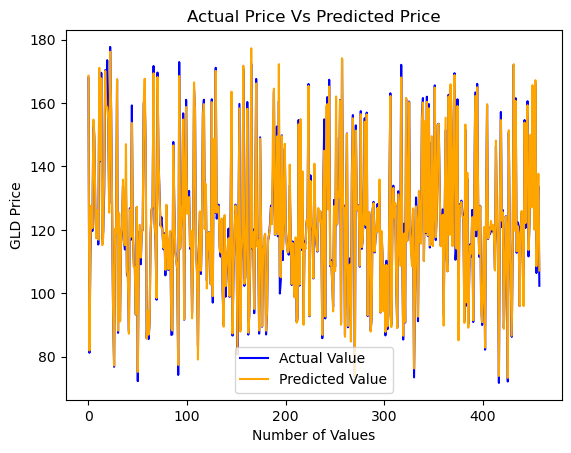

In [26]:
plt.plot(Y_test, color="Blue", label="Actual Value")
plt.plot(X_test_prediction, color="Orange", label="Predicted Value")
plt.title("Actual Price Vs Predicted Price")
plt.xlabel("Number of Values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()